# We want to classify colored images into 10 classes. 


## installations

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#https://keras.io/
!pip install -q keras

In [3]:
import tensorflow as tf
import keras

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt


from keras.models import Model, Sequential
from keras.layers import Input, Dense, Flatten, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Convolution2D
from keras.layers import UpSampling2D, Reshape
from keras.layers import Conv2DTranspose
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD, Adam
from keras.utils import to_categorical

import numpy as np
from keras.callbacks import TensorBoard



Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "<decorator-gen-121>", line 2, in initialize
  File "/usr/local/lib/python3.6/dist-packages/traitlets/config/application.py", line 87,

###Import the data

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
x_train[0][0][0]

array([59, 62, 63], dtype=uint8)

## Explore the data

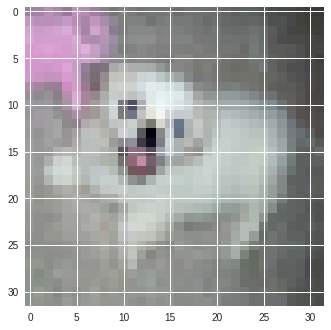

In [0]:
sample_id = 7000
plt.imshow(x_train [sample_id])

We have 50000 images in color of shape 32x32 pixels. There is one layer by color RGB.
Each pixel can take a value between 0 and 255.

In [0]:
print(x_train.shape) 
print(y_train.shape)

(50000, 32, 32, 3)
(50000, 1)


y_train[i] contain the class of the image in x_train[i]

In [0]:
min(y_train)

array([9], dtype=uint8)

In [0]:
max(y_train)

array([0], dtype=uint8)

In [0]:
(y_train[1][0]==9)

True

We have ten classes with value between 0 and 9

Let's print one image of each class

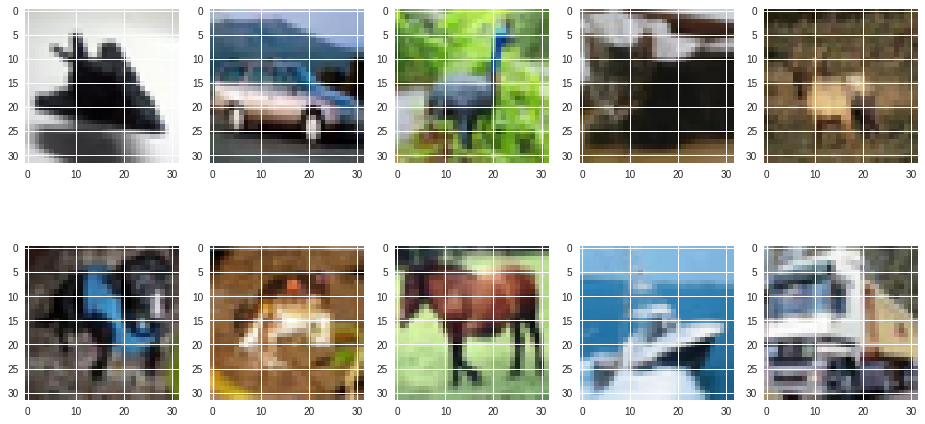

In [0]:
img_index=[]
for i in range (0,10):
  j=0
  while(y_train[j][0]!=i):
    j=j+1
  img_index.append(j)

fig=plt.figure(figsize=(16, 8))  
columns = 5
rows = 2
for i in range(1, columns*rows +1):
    img = x_train[img_index[i-1]]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [0]:
names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
x_test.shape

(10000, 32, 32, 3)

  ## Data processing

We center the values between -1 and 1

In [0]:
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

Then we transform the y_train in 1 hot vectors. Since there is 10 classes, the vectors will be of length 10.

In [0]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


###verify processing

In [0]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [0]:
y_train.shape 

(50000, 10)

In [0]:
x_train[0][0][0]

array([-0.5372549 , -0.51372549, -0.50588235])

#Multilayer perceptron

Multilayer perceptrons only use dense and dropout layers. Dense layers are used to fully connect the neurons, then dropout layers are used to select only the most relevant parameters and drop some connections. Every layer has to be activated with an activation function. Here I chose to use the relu function for all the hidden layers and the softmax function in the last layer. The softmax function is used to get values between 0 and 1, giving the probability for the image to belong to each class. Only use dense and droupout layers.

In [0]:
graph = tf.get_default_graph()
model1 = Sequential() 
#model.add(Flatten(input_shape=(32,32,3))) #chaque donne est une image de taille 32*32 en RGB
model1.add(Flatten(input_shape=(32,32,3)))

model1.add(Dense(512))         #On commence avec 512 neurones
model1.add(Activation('relu'))
model1.add(Dropout(0.2))				#on allege le modele en supprimant 20% des connexions du reseau de neurone

model1.add(Dense(256))
model1.add(Activation('relu'))
model1.add(Dropout(0.2))


model1.add(Dense(10))					#il y a 10 classes, il faut 10 neurones en sortie
model1.add(Activation('softmax'))

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [0]:
validation_data=(x_test, y_test)


In [0]:
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) #loss = categorical et pas binary car on a plus que 2 classes.#
model1.fit(x_train, y_train, batch_size=250, epochs=50, validation_data=(x_test, y_test)) 


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 270us/step - loss: 2.0499 - acc: 0.2642 - val_loss: 1.8366 - val_acc: 0.3640
Epoch 2/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.8468 - acc: 0.3455 - val_loss: 1.7312 - val_acc: 0.3957
Epoch 3/50
50000/50000 [==============================] - 13s 260us/step - loss: 1.7644 - acc: 0.3798 - val_loss: 1.6709 - val_acc: 0.4202
Epoch 4/50
50000/50000 [==============================] - 13s 259us/step - loss: 1.7120 - acc: 0.3962 - val_loss: 1.6295 - val_acc: 0.4356
Epoch 5/50
50000/50000 [==============================] - 13s 261us/step - loss: 1.6727 - acc: 0.4122 - val_loss: 1.5980 - val_acc: 0.4473
Epoch 6/50
50000/50000 [==============================] - 13s 263us/step - loss: 1.6432 - acc: 0.4234 - val_loss: 1.5738 - val_acc: 0.4547
Epoch 7/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.6190 - acc: 0.4327 - val_loss: 1.

In [0]:
model1.predict_classes(x_test)

array([3, 9, 8, ..., 3, 5, 7])

In [0]:
np.argmax( y_test ,axis=1)

array([3, 8, 8, ..., 5, 1, 7])

#Convolutional Network

https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

In [0]:
model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10))
model2.add(Activation('softmax'))


model2.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________

In [0]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 


In [0]:
model2.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_test, y_test), shuffle=True,verbose=1) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 292s 6ms/step - loss: 1.9787 - acc: 0.2698 - val_loss: 1.6476 - val_acc: 0.4067
Epoch 2/50
50000/50000 [==============================] - 294s 6ms/step - loss: 1.6064 - acc: 0.4097 - val_loss: 1.4269 - val_acc: 0.4905
Epoch 3/50
50000/50000 [==============================] - 295s 6ms/step - loss: 1.4541 - acc: 0.4720 - val_loss: 1.3976 - val_acc: 0.5103
Epoch 4/50
50000/50000 [==============================] - 292s 6ms/step - loss: 1.3584 - acc: 0.5096 - val_loss: 1.2418 - val_acc: 0.5579
Epoch 5/50
50000/50000 [==============================] - 290s 6ms/step - loss: 1.2889 - acc: 0.5380 - val_loss: 1.1591 - val_acc: 0.5902
Epoch 6/50
50000/50000 [==============================] - 287s 6ms/step - loss: 1.2265 - acc: 0.5629 - val_loss: 1.1274 - val_acc: 0.6053
Epoch 7/50
50000/50000 [==============================] - 293s 6ms/step - loss: 1.1640 - acc: 0.5881 - val_loss: 1.0648 - 

The computation takes a lot of time but we have a 79% accuracy on the validation dataset

# Using tensorflow DataFlow graph

I found this process in google: 
https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c

first define the dataflow graph, then create a TensorFlow session to run parts of the graph. This process is used id parallel programing

###Getting started with tensorflow

In [0]:
#inputs
pi=pi = tf.constant(3.14, name="pi")
r = tf.placeholder(tf.float32, name="r")
    
a = pi * r * r

In [0]:
#define the graph
graph = tf.get_default_graph()
print(graph.get_operations())

[<tf.Operation 'x' type=Placeholder>, <tf.Operation 'y' type=Placeholder>, <tf.Operation 'keep_prob' type=Placeholder>, <tf.Operation 'Placeholder' type=Placeholder>, <tf.Operation 'init' type=NoOp>, <tf.Operation 'pi' type=Const>, <tf.Operation 'r' type=Placeholder>, <tf.Operation 'mul' type=Mul>, <tf.Operation 'mul_1' type=Mul>]


* To evaluate the operation a=pi*r*r, we need to create and the run a session.

* You can provide values for placeholders defined earlier to the session as python dictionary where the key is your placeholder name and value can be a list.

In [0]:
with tf.Session() as sess:# creation of sess
  print(a.eval(feed_dict={r: 5})) #run of sess=a.eval, define the unknown variable with feed_dict={r: [5]}

78.5


## data load

In [0]:
import pickle


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
test=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/test_batch")

batch1=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_1")
batch2=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_2")
batch3=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_3")
batch4=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_4")
batch5=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_5")

In [0]:
batch2[b'data'].shape

(10000, 3072)

## process data

In [0]:
# normalize the data and one hot encode the labels
test_data=test[b'data']
test_data=np.reshape(test_data, (10000,32,32,3))
test_data=(test_data -127.5) / 127.5

test_labels=to_categorical(test[b'labels'],10)


batch1_data=batch1[b'data']
batch1_data=np.reshape(batch1_data, (10000,32,32,3))
batch1_data=(batch1_data -127.5) / 127.5

batch1_labels=to_categorical(batch1[b'labels'],10)


batch2_data=batch2[b'data']
batch2_data=np.reshape(batch2_data, (10000,32,32,3))
batch2_data=(batch2_data -127.5) / 127.5

batch2_labels=to_categorical(batch2[b'labels'],10)


batch3_data=batch3[b'data']
batch3_data=np.reshape(batch3_data, (10000,32,32,3))
batch3_data=(batch3_data -127.5) / 127.5

batch3_labels=to_categorical(batch3[b'labels'],10)


batch4_data=batch4[b'data']
batch4_data=np.reshape(batch4_data, (10000,32,32,3))
batch4_data=(batch4_data -127.5) / 127.5

batch4_labels=to_categorical(batch4[b'labels'],10)


batch5_data=batch5[b'data']
batch5_data=np.reshape(batch5_data, (10000,32,32,3))
batch5_data=(batch5_data -127.5) / 127.5

batch5_labels=to_categorical(batch5[b'labels'],10)



In [0]:
test_data.shape

(10000, 32, 32, 3)

## define the variables

In [0]:
#reset tensorflow graph
tf.reset_default_graph()

#define the variable

#x: the input


#color
x = tf.placeholder(tf.float32, shape=(None, 32, 32, 3), name='x')

#y: the output
y =  tf.placeholder(tf.float32, shape=(None, 10), name='y')

#the rate of nodes to keep in Dropout layers, will be use in the fully connected layers
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

#Normalization parameter
training = tf.placeholder(tf.bool)

## Define the model

The entire model consists of 14 layers in total. In addition to layers below lists what techniques are applied to build the model.

 
    Convolution with 64 different filters in size of (3x3)
1. Convolution with 64 different filters in size of (3x3)
2.    Max Pooling by 2
    *   ReLU activation function
    *  Batch Normalization
3.   Convolution with 128 different filters in size of (3x3)
4.   Max Pooling by 2
        * ReLU activation function
        * Batch Normalization
5. Convolution with 256 different filters in size of (3x3)
6. Max Pooling by 2
     * ReLU activation function
     *  Batch Normalization
7. Convolution with 512 different filters in size of (3x3)
8. Max Pooling by 2
    * ReLU activation function
    * Batch Normalization
9. Flattening the 3-D output of the last convolutional operations
10. Fully Connected Layer with 128 units
       * Dropout
       * Batch Normalization
11. Fully Connected Layer with 256 units
      *  Dropout
      * Batch Normalization
12. Fully Connected Layer with 512 units
       * Dropout
       * Batch Normalization
13. Fully Connected Layer with 1024 units
       * Dropout
       * Batch Normalization
14. Fully Connected Layer with 10 units (number of image classes)

        

 


In [0]:
def conv_net(x, keep_prob):
  # shape = [filter size, filter size, number of input layers, number of output layers] stddev-> standard deviation
  
  # define the shape of each layer
    conv1_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 3, 64], mean=0, stddev=0.08))
    conv2_filter = tf.Variable(tf.truncated_normal(shape=[3, 3, 64, 128], mean=0, stddev=0.08))
    conv3_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 128, 256], mean=0, stddev=0.08))
    conv4_filter = tf.Variable(tf.truncated_normal(shape=[5, 5, 256, 512], mean=0, stddev=0.08))

    #The stride of the sliding window for each dimension of input
    # 1, 2
    conv1 = tf.nn.conv2d(x, conv1_filter, strides=[1,1,1,1], padding='SAME')
    conv1 = tf.nn.relu(conv1)
    conv1_pool = tf.nn.max_pool(conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv1_bn = tf.layers.batch_normalization(conv1_pool)

    # 3, 4
    conv2 = tf.nn.conv2d(conv1_bn, conv2_filter, strides=[1,1,1,1], padding='SAME')
    conv2 = tf.nn.relu(conv2)
    conv2_pool = tf.nn.max_pool(conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')    
    conv2_bn = tf.layers.batch_normalization(conv2_pool)
  
    # 5, 6
    conv3 = tf.nn.conv2d(conv2_bn, conv3_filter, strides=[1,1,1,1], padding='SAME')
    conv3 = tf.nn.relu(conv3)
    conv3_pool = tf.nn.max_pool(conv3, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')  
    conv3_bn = tf.layers.batch_normalization(conv3_pool)
    
    # 7, 8
    conv4 = tf.nn.conv2d(conv3_bn, conv4_filter, strides=[1,1,1,1], padding='SAME')
    conv4 = tf.nn.relu(conv4)
    conv4_pool = tf.nn.max_pool(conv4, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
    conv4_bn = tf.layers.batch_normalization(conv4_pool)
    
    # 9
    flat = tf.contrib.layers.flatten(conv4_bn)  

    # 10
    full1 = tf.contrib.layers.fully_connected(inputs=flat, num_outputs=128, activation_fn=tf.nn.relu)
    full1 = tf.nn.dropout(full1, keep_prob)
    full1 = tf.layers.batch_normalization(full1)
    
    # 11
    full2 = tf.contrib.layers.fully_connected(inputs=full1, num_outputs=256, activation_fn=tf.nn.relu)
    full2 = tf.nn.dropout(full2, keep_prob)
    full2 = tf.layers.batch_normalization(full2)
    
    # 12
    full3 = tf.contrib.layers.fully_connected(inputs=full2, num_outputs=512, activation_fn=tf.nn.relu)
    full3 = tf.nn.dropout(full3, keep_prob)
    full3 = tf.layers.batch_normalization(full3)    
    
    # 13
    full4 = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=1024, activation_fn=tf.nn.relu)
    full4 = tf.nn.dropout(full4, keep_prob)
    full4 = tf.layers.batch_normalization(full4)        
    
    # 14
    out = tf.contrib.layers.fully_connected(inputs=full3, num_outputs=10, activation_fn=None)
    return out

## Train the model

First we choose the parameters of the training proces: epoch and batch size but also keep proba used in the model

In [0]:
epochs = 10
batch_size = 128
keep_probability = 0.7
learning_rate = 0.001

In [0]:
x

<tf.Tensor 'x:0' shape=(?, 32, 32, 3) dtype=float32>

In [0]:

logits = conv_net(x, keep_prob)
model = tf.identity(logits, name='logits') # Name logits Tensor, so that can be loaded from disk after training

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

In [0]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    session.run(optimizer, 
                feed_dict={
                    x: feature_batch,
                    y: label_batch,
                    keep_prob: keep_probability
                })

In [0]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    loss = sess.run(cost, 
                    feed_dict={
                        x: feature_batch,
                        y: label_batch,
                        keep_prob: 1.
                    })
    valid_acc = sess.run(accuracy, 
                         feed_dict={
                             x: valid_features,
                             y: valid_labels,
                             keep_prob: 1.
                         })
    
    print('Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(loss, valid_acc))



In [0]:
def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]




#### run session

In [0]:
batches=[batch1_data,batch2_data,batch3_data,batch4_data,batch5_data]
labels=[batch1_labels,batch2_labels,batch3_labels,batch4_labels,batch5_labels]

with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        for i in range(1, 6):
          batch_features=batches[i]
          batch_labels=labels[i]
          
          train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
                
          print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
print_stats(sess, batch_features, batch_labels, cost, accuracy)
   
  



###NOTE

This method doesn't work. I don't get any error but the part "run session" always eventually stop runing after a few seconds. I did not found where the problem was, maybe my computer is not powerfull enough.

#Using PCA

https://github.com/wikiabhi/Cifar-10/blob/master/cifar10_pca.ipynb

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

##Process and explore data

### transforming images in one dimention vectors

In [0]:
x_train_PCA = x_train.reshape(x_train.shape[0],-1)
x_test_PCA = x_test.reshape(x_test.shape[0], -1)

In [12]:
x_train_PCA.shape

(50000, 3072)

### transform labels from one hot encoding to scalar

In [0]:
def one_hot_to_scalar(matrix):
  if matrix.shape[1]==1:
    return matrix.flatten()
  else:
    matrix=matrix.tolist()
    vector=[]
    for i in range (0,len(matrix)):
      vector.append(matrix[i].index(max(matrix[i])))
    return np.asarray(vector)

In [0]:
y_train_PCA=one_hot_to_scalar(y_train)
y_test_PCA=one_hot_to_scalar(y_test)

In [14]:
y_train_PCA[0]

6

### reprensent data distribution

In [0]:
pca = PCA(2)  
vect=pca.fit_transform(x_train_PCA)  

In [0]:
def get_class(classe,y_train,x_train):
  images=[]
  for i in range(0,len(y_train)):
    if(y_train[i]==classe):
      images.append(x_train[i])
  return (images)

In [0]:
x_train_ordered=[]
for j in range (0,10):
  x_train_ordered.append(get_class(j,y_train_PCA,vect))


In [52]:
x_train_ordered=np.asarray(x_train_ordered)
x_train_ordered.shape

(10, 5000, 2)

In [59]:
x_train_ordered[0].shape

(5000, 2)

In [62]:
x_train_ordered[0][:,1]

array([-1511.46660966,   316.082933  ,  -845.84743375, ...,
         -58.74672808, -1212.90483641,   374.83776575])

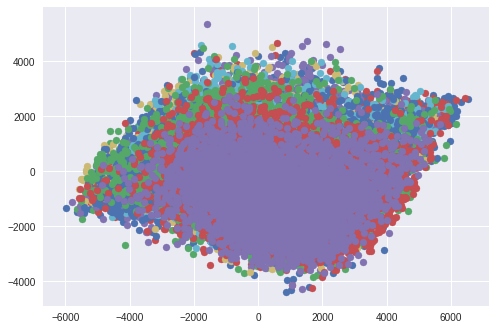

In [63]:
for i in range (0,10):
  plt.scatter(x_train_ordered[i][:,0],x_train_ordered[i][:,1])
  
plt.show()

## perform PCA

In [0]:
pca = PCA()  
pca.fit_transform(x_train_PCA)  

array([[-1.00408120e-01,  4.28084512e-02,  2.35562435e-02, ...,
        -1.19574561e-05, -1.82524429e-05, -5.48656315e-06],
       [ 1.30162100e-02, -1.49010701e-02,  9.41765113e-02, ...,
         1.70093472e-06,  9.04651588e-06, -1.20942106e-05],
       [ 1.21258036e-01, -1.80738860e-01, -4.31940471e-02, ...,
        -1.63858995e-05, -3.35852141e-06, -6.17207100e-06],
       ...,
       [ 1.10956327e-02, -1.77921902e-01, -6.17905691e-03, ...,
        -5.96614225e-06,  2.92442899e-05,  2.27114085e-05],
       [ 1.78320141e-01, -5.29565122e-02,  8.73129044e-02, ...,
        -7.32700913e-06,  1.16858504e-05, -2.62062833e-05],
       [ 6.57693561e-02, -1.85755056e-02, -6.97405956e-02, ...,
         1.51838158e-05,  3.77041524e-06, -4.40009767e-07]])

In [0]:
explained_variance = pca.explained_variance_ratio_ 


1.0000000000000013

In [0]:
#We want to take vectors that explains 99% of variance

k = 0
total = sum(explained_variance)
sum_variance = 0

while(sum_variance / total < 0.99):
    sum_variance = sum_variance + explained_variance[k]
    k += 1
    
k


658

Then we apply the PCA model to the data

In [0]:
pca = PCA(n_components=k, whiten=True) 
X_train_PCA = pca.fit_transform(x_train_PCA)  
X_test_PCA = pca.fit_transform(x_test_PCA)  

## Predict class

###with logisitc regression

In [0]:
classifier_logit = LogisticRegression()
classifier_logit.fit(X_train_PCA, y_train_PCA)


# Predicting the Test set results
y_pred_logit = classifier_logit.predict(X_test_PCA)   

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


###with SVM

In [0]:
classifier_svm = svm.SVC()
classifier_svm.fit(X_train_PCA, y_train_PCA)


# Predicting the Test set results
y_pred_svm = classifier_svm.predict(X_test_PCA)  

## Results in accuracy measure

In [0]:
import sklearn as skl
from sklearn import metrics
from sklearn.metrics import accuracy_score

cm_logit = skl.metrics.confusion_matrix(y_test_PCA, y_pred_logit)  
print(cm_logit)  
skl.metrics.accuracy_score(y_test_PCA, y_pred_logit)

[[261  74  93  46  50  54  49 102 206  65]
 [ 40 189  55  82  38  32 131 124 149 160]
 [131  78 174  62 163  67 119 108  56  42]
 [111 122  54 105  85 144 149 101  65  64]
 [ 76  68 144  83 210  68 148  97  36  70]
 [121  76  79  95  80 225 103 108  72  41]
 [ 67 120  94  82 155  79 155 167  28  53]
 [ 73 119  63  61 106  99 132  93 102 152]
 [139 116  44  38  20  55  45  88 321 134]
 [ 55 157  35  42  27  32 102 111 152 287]]


0.202

With the logistic regression classifier I have an accuracy of 20%

In [0]:
cm_svm = skl.metrics.confusion_matrix(y_test_PCA, y_pred_svm)  
print(cm_svm)  
skl.metrics.accuracy_score(y_test_PCA, y_pred_svm)

NameError: ignored

#Using KNN


The idea of KNN algorithm is to find, for each unlabeled data, its k nearest neighbors in the labeled dataset and then label the new data by taking the most recurent label in the neigbhors


## data prep

Here, i use a file where the data are already organised in batches

In [0]:
!ls "drive/My Drive/Colab Notebooks"	

ls: cannot access 'drive/My Drive/Colab Notebooks': No such file or directory


In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
# defining the K as in K-Nearest Neighbors
k=8

# length of test batch
len_test=100

In [0]:
test=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/test_batch")
i=1
batch1=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_"+str(i))

we use the unpicke function define in the CIFAR 10 documentation. test is a dicionary 

In [83]:
test.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

In [0]:
# reading the test data and labels in seperate variables
test_data=test[b'data'][0:len_test]
test_labels=test[b'labels'][0:len_test]


## functions

In [0]:
# Euclidean distance
def euclidianDistance(x, y):
  return np.sqrt(np.sum(np.square(x-y)))

In [87]:
# find the k minimal values
def k_mins(x,k):
  minis=[]
  for i in range (0,k):
    m=max(x)
   
    for j in range (0,len(x)):
      if x[j]<m:
        m=x[j]
        
    minis.append(m)
    x.remove(m)
  return minis
  

a=[0,2,6,4,0,7]

minis=k_mins(a,3)
minis

[0, 0, 2]

In [88]:
def add_distance(distance, label, liste,k):
  
  # return a list of form [["distance1", "label1"],...,["distancek", "labelk"]]
 
  
  if len(liste)<k:
    liste.append([distance,label])
    
  else:
    # list of distances
    dist=[row[0] for row in liste]
    # index of max
    i=dist.index(max(dist))
    
    if distance < max(dist):
      liste.remove(liste[i])
      liste.append([distance,label])
   
 
  return liste
    
a=[[2, 4],[6, 3], [1, 5],[2, 5]]
add_distance(8, 1, a,5)

[[2, 4], [6, 3], [1, 5], [2, 5], [8, 1]]

In [0]:
def most_recurent_label(min_dist):
  k_labels= [0]*10
  
  #liste of labels
  labels=[row[1] for row in min_dist]
  for i in range (len(labels)):
    for j in range (0,10):
      if(labels[i]==j):
        k_labels[j]=k_labels[j]+1
        
  lab=k_labels.index(max(k_labels))
      
  return(lab)


In [0]:
a=[[2, 4], [6, 3], [1, 5], [2, 5], [8, 1]]
a=np.array(a)
a.shape
l=most_recurent_label(a)
print(l)

5


In [0]:
def most_recurent_element(labels):
  k_labels= [0]*10
  
  for i in range (len(labels)):
    for j in range (0,10):
      if(labels[i]==j):
        k_labels[j]=k_labels[j]+1
        
  lab=k_labels.index(max(k_labels))
      
  return(lab)


In [0]:
k_labels=[1,3,9,8,9,0]
print(k_labels.index(max(k_labels)))

2


## implementation

In [90]:
knn_labels=[0]*(len_test)

len(knn_labels)

100

In [0]:

def KNN(k):

  #loop through the data to be labeled
  for x in range(0,len_test):
    print(x)
    k_min_distance_x=[]
 
  
    #loop through the batched contening labeled data
    for i in range(1,6):
    
      min_distance_batch_i=[]
      batch_i=unpickle("drive/My Drive/Colab Notebooks/cifar-10-python/cifar-10-batches-py/data_batch_"+str(i))
      batch_i_data=batch_i[b'data']
      batch_i_labels=batch_i[b'labels']
    
      #loop through the labeled data
      for j in range(0,len(batch_i_data)):
        #calculate the euclidian distance between the data to label and the data of the batch
        distance=euclidianDistance(test_data[x], batch_i_data[j])
      
        #verify if the distance is in the k lowest and add (distance, data) if it is the case
        add_distance(distance,batch_i_labels[j], k_min_distance_x,k)
      
      # end loop through the labeled data
    
    
    #end loop through the labeled data
    knn_labels[x]=most_recurent_label(k_min_distance_x)
   
  return(knn_labels)  
    
      
      

## accuracy

In [0]:
acc=0
for i in range(0,len_test):
  if(knn_labels[i]==test_labels[i]):
    acc=acc+1
acc=acc/len_test*100

acc


26.0

In [0]:
# initializing correctly predicted counts for all labels


def give_accuracy(knn_labels):
  correct=[0,0,0,0,0,0,0,0,0,0]
  wrong=[0,0,0,0,0,0,0,0,0,0]
  # for every predicted label comparing it with the true label
  for i in range(0,len(knn_labels)):
    pair=([knn_labels[i],test_labels[i]])
    if int(knn_labels[i]) == test_labels[i]:
      #counting the correctly predicted lables
      correct[test_labels[i]]+=1
  
    else:
      #counting the wrongly predicted labels
      wrong[test_labels[i]]+=1
    
    
  accuracy=sum(correct)/len_test*100
  return(accuracy)







In [0]:
list_k=a = range(10,200,5)
accuracy_list=[0]*len(list_k)

for i in range (0,len(list_k)):
  labels=KNN(list_k[i])
  accuracy_list[i]=give_accuracy(labels)
  
plot(list_k, accuracy_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
0
1
2


The maximum accuracy is 26%

# Generate images

In [0]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
def get_class(classe,y_train,x_train):
  images=[]
  for i in range(0,len(y_train)):
    if(y_train[i]==classe):
      images.append(x_train[i])
  return (np.asarray(images),np.asarray([classe]*len(images)))
   

In [68]:
if(y_train[0]==6):
  print("ok")

ok


### Define generator and discriminator

In [69]:
tensorboard = TensorBoard(log_dir='./tboard') 

generator = Sequential()
generator.add(Dense(7*7*128, input_shape=(10,)))
generator.add(LeakyReLU(0.1))
generator.add(Reshape((7,7,128)))
generator.add(UpSampling2D(size=(2,2)))
generator.add(Conv2DTranspose(64, kernel_size=(3,3)))
generator.add(UpSampling2D(size=(2,2)))
generator.add(Conv2DTranspose(3, kernel_size=(1,1)))


generator.add(Reshape((32,32,3)))



discriminator=Sequential()

discriminator.add(Flatten(input_shape=(32,32,3)))
discriminator.add(Dense(512))
discriminator.add(Activation('relu'))
discriminator.add(Dropout(0.1)) 			
discriminator.add(Dense(64))
discriminator.add(Activation('relu'))
discriminator.add(Dropout(0.1))
discriminator.add(Dense(1))
discriminator.add(Activation('sigmoid'))


discriminator.compile(loss='binary_crossentropy', optimizer=Adam(1e-4,1e-5))
discriminator.trainable=False

gan_input=Input(shape=(10,))
fake_image=generator(gan_input)
gan_output=discriminator(fake_image)
gan=Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(1e-4,1e-5))
gan.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 10)                0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 32, 32, 3)         142979    
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1606273   
Total params: 1,749,252
Trainable params: 142,979
Non-trainable params: 1,606,273
_________________________________________________________________


### train algo

In [70]:
batch_size=16
classe=8
#x_train_gan,y_train_gan=get_class(classe,y_train,x_train)
x_train_gan=x_train[np.where(y_train == classe)[0]] #choix de la classe 
print(x_train_gan.shape)
num_batches= int(len(x_train_gan) / batch_size)


for epoch in range(80):
	for batch in range (num_batches):
		#  Select  a  random   batch   from   x train c
		x=x_train_gan[np.random.randint(0, len(x_train_gan), size=batch_size)]
		# Gaussian  noise  for the  generator  mode
		noise=np.random.normal(0,1,size=[batch_size,10])
		#Generate  fake  images
		gen_imgs=generator.predict(noise)
		
		disc_data=np.concatenate([x, gen_imgs])
		# True images are labeled 1 ,false ones are 0
		labels = [1]*batch_size + [0]*batch_size
		
		discriminator.trainable=True
		dloss=discriminator.train_on_batch(disc_data, labels)  
		
		discriminator.trainable=False
		gloss=gan.train_on_batch(noise, [1]*batch_size)
		

	print('Epoch %d' %(epoch+1)+' gloss=%.4f, dloss=%4.f' %(gloss, dloss))
		

				



(5000, 32, 32, 3)
Epoch 1 gloss=0.2537, dloss=   1
Epoch 2 gloss=0.6352, dloss=   0
Epoch 3 gloss=0.6722, dloss=   0
Epoch 4 gloss=0.6769, dloss=   0
Epoch 5 gloss=0.6550, dloss=   0
Epoch 6 gloss=0.7067, dloss=   0
Epoch 7 gloss=0.6617, dloss=   0
Epoch 8 gloss=0.6638, dloss=   0
Epoch 9 gloss=0.6535, dloss=   0
Epoch 10 gloss=0.6500, dloss=   0
Epoch 11 gloss=0.6668, dloss=   0
Epoch 12 gloss=0.5465, dloss=   1
Epoch 13 gloss=0.6773, dloss=   1
Epoch 14 gloss=0.4288, dloss=   1
Epoch 15 gloss=0.8244, dloss=   1
Epoch 16 gloss=0.5047, dloss=   1
Epoch 17 gloss=0.9171, dloss=   1
Epoch 18 gloss=0.7716, dloss=   1
Epoch 19 gloss=0.7298, dloss=   0
Epoch 20 gloss=0.7320, dloss=   0
Epoch 21 gloss=0.9458, dloss=   1
Epoch 22 gloss=0.2443, dloss=   1
Epoch 23 gloss=0.7233, dloss=   1
Epoch 24 gloss=0.9795, dloss=   1
Epoch 25 gloss=1.0047, dloss=   0
Epoch 26 gloss=0.9457, dloss=   0
Epoch 27 gloss=1.2523, dloss=   0
Epoch 28 gloss=1.1401, dloss=   1
Epoch 29 gloss=0.8617, dloss=   0
Epoch

### implementation


In [0]:
		
noise=np.random.normal(0,1,size=[4,10])
gen_imgs=generator.predict(noise)

#plt.imsave('image0.png',((gen_imgs[0]+1)/2))

#plt.imsave('image1.png',((gen_imgs[1]+1)/2))
#plt.imsave('image2.png',((gen_imgs[2]+1)/2))

#plt.imsave('image3.png',((gen_imgs[3]+1)/2))

In [79]:
#plt.imshow(gen_imgs[0])
np.amin(gen_imgs[3])
#np.amax(gen_imgs[0])

#plt.imshow(gen_imgs[1])

-16.065279